In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
_split = 0.8

## Arima for VCB dataset

In [3]:
data_path = '../../Dataset/VCB.csv';

In [4]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [5]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2339 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB
None
              Close
count   2339.000000
mean   49573.071881
std    22421.327527
min    15680.371094
25%    25332.525391
50%    50432.792969
75%    66027.140625
max    97400.000000


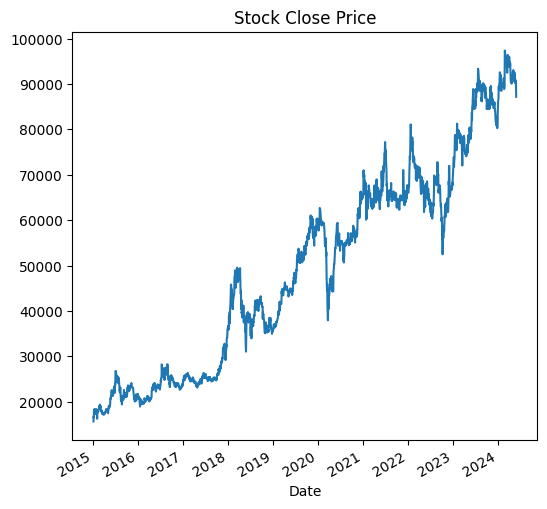

In [6]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [7]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [8]:
train_data

,Close
Date,
2015-01-05,15680.371094
2015-01-06,16712.621094
2015-01-07,16516.001953
2015-01-08,17007.550781
2015-01-09,18138.109375
...,...
2022-06-29,63928.875000
2022-06-30,63336.156250
2022-07-01,62658.765625


In [9]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1871, 1)
Test set shape: (468, 1)


In [10]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -0.7272181228151362
Initial p-value: 0.8395729143966156
Differencing Level: 1
ADF Statistic: -29.724375692103642
p-value: 0.0
Series became stationary after 1 differencing levels.


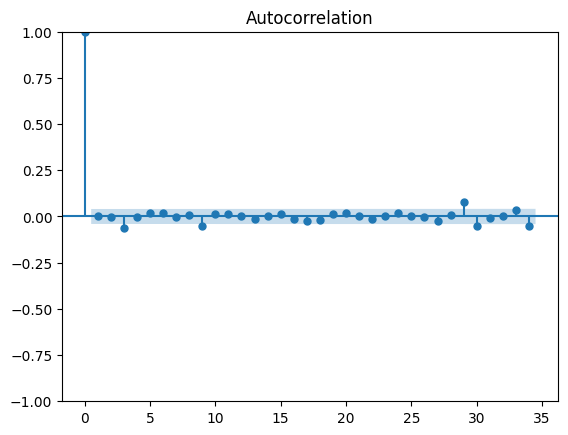

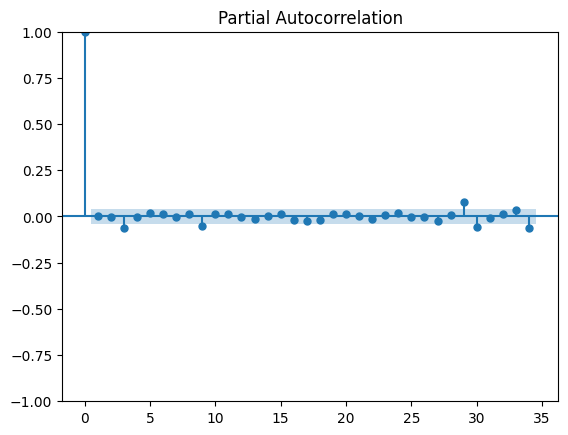

In [11]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [12]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
model_fit = model.fit()

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1871
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -15229.445
Date:                Thu, 13 Jun 2024   AIC                          30472.889
Time:                        22:53:06   BIC                          30511.625
Sample:                             0   HQIC                         30487.161
                               - 1871                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1773      0.283      0.625      0.532      -0.378       0.733
ar.L2         -0.3419      0.211     -1.621      0.105      -0.755       0.072
ar.L3         -0.3476      0.245     -1.420      0.1

In [15]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13972\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-06,61642.675781,62762.821722
2022-07-07,63928.875000,62717.561167
2022-07-08,62658.765625,62673.380085
2022-07-11,60965.285156,62679.936778
2022-07-12,60880.609375,62711.939741
...,...,...
2024-05-27,90200.000000,62708.265889
2024-05-28,90700.000000,62708.265889
2024-05-29,89800.000000,62708.265889


In [17]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2340    62708.265889
2341    62708.265889
2342    62708.265889
2343    62708.265889
2344    62708.265889
2345    62708.265889
2346    62708.265889
2347    62708.265889
2348    62708.265889
2349    62708.265889
2350    62708.265889
2351    62708.265889
2352    62708.265889
2353    62708.265889
2354    62708.265889
2355    62708.265889
2356    62708.265889
2357    62708.265889
2358    62708.265889
2359    62708.265889
2360    62708.265889
2361    62708.265889
2362    62708.265889
2363    62708.265889
2364    62708.265889
2365    62708.265889
2366    62708.265889
2367    62708.265889
2368    62708.265889
2369    62708.265889
Name: predicted_mean, dtype: float64

In [18]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [19]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [20]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    62708.265889
2024-06-03    62708.265889
2024-06-04    62708.265889
2024-06-05    62708.265889
2024-06-06    62708.265889
2024-06-07    62708.265889
2024-06-10    62708.265889
2024-06-11    62708.265889
2024-06-12    62708.265889
2024-06-13    62708.265889
2024-06-14    62708.265889
2024-06-17    62708.265889
2024-06-18    62708.265889
2024-06-19    62708.265889
2024-06-20    62708.265889
2024-06-21    62708.265889
2024-06-24    62708.265889
2024-06-25    62708.265889
2024-06-26    62708.265889
2024-06-27    62708.265889
2024-06-28    62708.265889
2024-07-01    62708.265889
2024-07-02    62708.265889
2024-07-03    62708.265889
2024-07-04    62708.265889
2024-07-05    62708.265889
2024-07-08    62708.265889
2024-07-09    62708.265889
2024-07-10    62708.265889
2024-07-11    62708.265889
dtype: float64

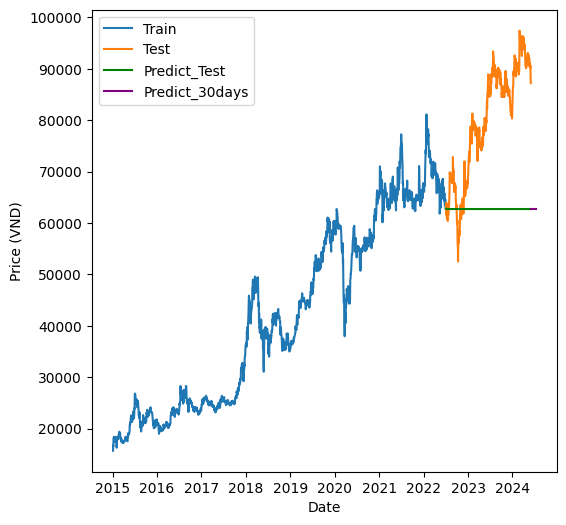

In [21]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 20209.915
MAE: 17515.443
MAPE: 20.585


## Arima for BID dataset

In [23]:
data_path = '../../Dataset/BID.csv';

In [24]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [25]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   25785.842410
std    10557.656795
min     9101.712891
25%    15240.078125
50%    26740.693359
75%    32138.220703
max    54400.000000


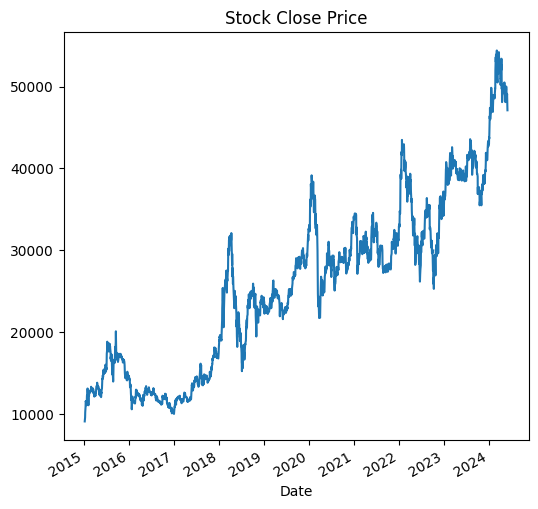

In [26]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [27]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [28]:
train_data

,Close
Date,
2015-01-05,9101.712891
2015-01-06,9313.380859
2015-01-07,9595.604492
2015-01-08,9595.604492
2015-01-09,10230.608398
...,...
2022-07-06,31591.089844
2022-07-07,32212.263672
2022-07-08,31058.656250


In [29]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1876, 1)
Test set shape: (469, 1)


In [30]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.0662395859139857
Initial p-value: 0.7283457408139377
Differencing Level: 1
ADF Statistic: -50.07262520728113
p-value: 0.0
Series became stationary after 1 differencing levels.


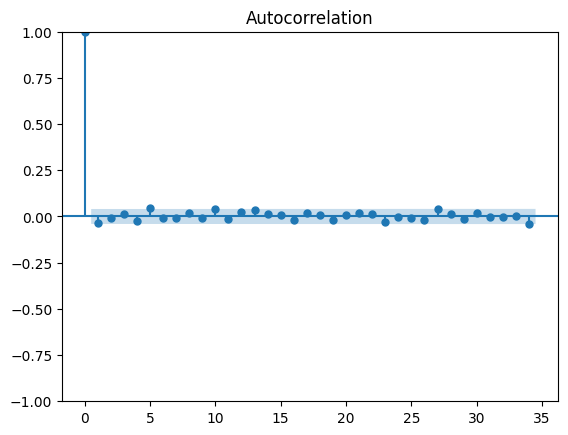

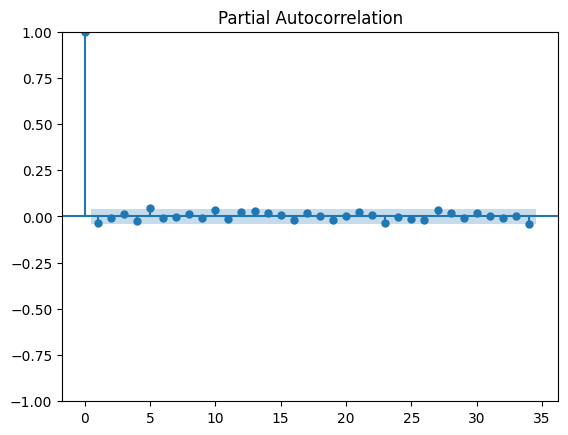

In [31]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [32]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
model_fit = model.fit()

In [34]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1876
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -14545.072
Date:                Thu, 13 Jun 2024   AIC                          29104.144
Time:                        22:53:08   BIC                          29142.899
Sample:                             0   HQIC                         29118.420
                               - 1876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2896      0.121     -2.395      0.017      -0.527      -0.053
ar.L2          0.1833      0.124      1.479      0.139      -0.060       0.426
ar.L3          0.7934      0.094      8.459      0.0

In [35]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13972\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-13,31990.416016,32433.098028
2022-07-14,32079.154297,32392.869686
2022-07-15,31768.568359,32503.720589
2022-07-18,31502.351562,32471.539276
2022-07-19,31635.460938,32469.255525
...,...,...
2024-05-27,48900.000000,32644.864118
2024-05-28,49100.000000,32644.864118
2024-05-29,48600.000000,32644.864118


In [37]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    32644.864118
2347    32644.864118
2348    32644.864118
2349    32644.864118
2350    32644.864118
2351    32644.864118
2352    32644.864118
2353    32644.864118
2354    32644.864118
2355    32644.864118
2356    32644.864118
2357    32644.864118
2358    32644.864118
2359    32644.864118
2360    32644.864118
2361    32644.864118
2362    32644.864118
2363    32644.864118
2364    32644.864118
2365    32644.864118
2366    32644.864118
2367    32644.864118
2368    32644.864118
2369    32644.864118
2370    32644.864118
2371    32644.864118
2372    32644.864118
2373    32644.864118
2374    32644.864118
2375    32644.864118
Name: predicted_mean, dtype: float64

In [38]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [40]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    32644.864118
2024-06-03    32644.864118
2024-06-04    32644.864118
2024-06-05    32644.864118
2024-06-06    32644.864118
2024-06-07    32644.864118
2024-06-10    32644.864118
2024-06-11    32644.864118
2024-06-12    32644.864118
2024-06-13    32644.864118
2024-06-14    32644.864118
2024-06-17    32644.864118
2024-06-18    32644.864118
2024-06-19    32644.864118
2024-06-20    32644.864118
2024-06-21    32644.864118
2024-06-24    32644.864118
2024-06-25    32644.864118
2024-06-26    32644.864118
2024-06-27    32644.864118
2024-06-28    32644.864118
2024-07-01    32644.864118
2024-07-02    32644.864118
2024-07-03    32644.864118
2024-07-04    32644.864118
2024-07-05    32644.864118
2024-07-08    32644.864118
2024-07-09    32644.864118
2024-07-10    32644.864118
2024-07-11    32644.864118
dtype: float64

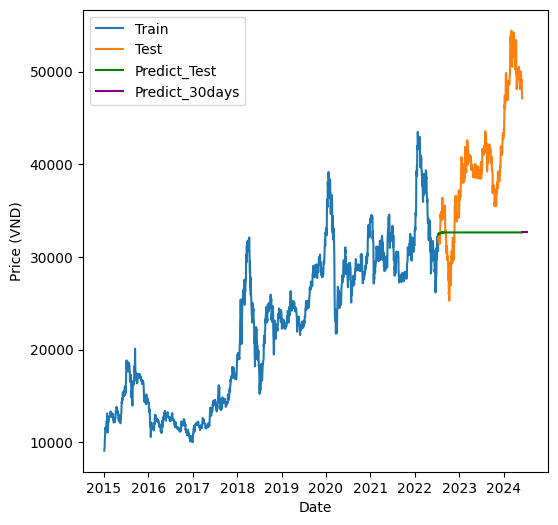

In [41]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 9707.852
MAE: 7987.018
MAPE: 18.513


## Arima for CTG dataset

In [43]:
data_path = '../../Dataset/CTG.csv';

In [44]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [45]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   19510.971566
std     7060.095727
min     9637.772461
25%    13451.279297
50%    16606.089844
75%    25729.027344
max    37719.050781


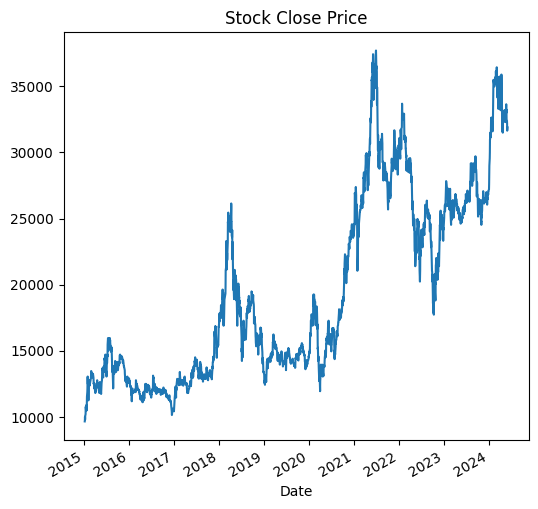

In [46]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [47]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [48]:
train_data

,Close
Date,
2015-01-05,9637.772461
2015-01-06,9707.109375
2015-01-07,9984.455078
2015-01-08,9776.445312
2015-01-09,10053.791992
...,...
2022-07-06,23133.750000
2022-07-07,23536.466797
2022-07-08,23178.496094


In [49]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1876, 1)
Test set shape: (469, 1)


In [50]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.3022211165237332
Initial p-value: 0.6281555385005244
Differencing Level: 1
ADF Statistic: -51.10753306643303
p-value: 0.0
Series became stationary after 1 differencing levels.


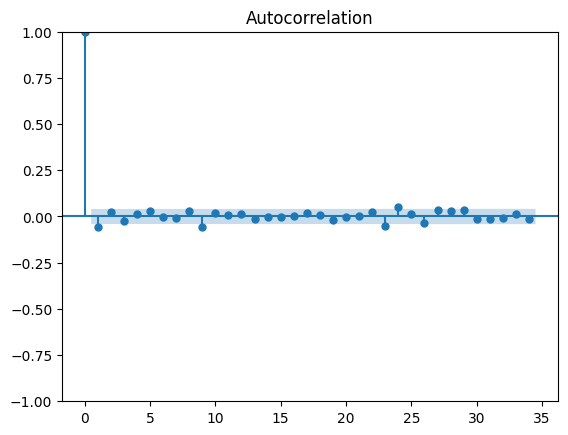

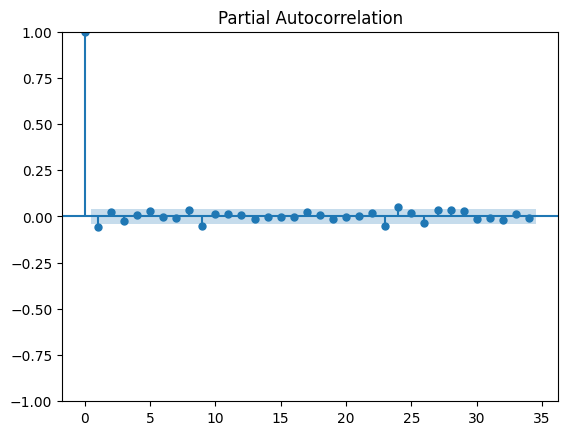

In [51]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [52]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
model_fit = model.fit()

In [54]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1876
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -14058.888
Date:                Thu, 13 Jun 2024   AIC                          28131.776
Time:                        22:53:10   BIC                          28170.531
Sample:                             0   HQIC                         28146.052
                               - 1876                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0408      0.346     -3.012      0.003      -1.718      -0.364
ar.L2         -0.8405      0.381     -2.209      0.027      -1.586      -0.095
ar.L3         -0.1720      0.274     -0.627      0.5

In [55]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_13972\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2022-07-13,23760.197266,23028.089149
2022-07-14,24162.912109,22993.113362
2022-07-15,24162.912109,23010.084477
2022-07-18,24073.419922,23018.082851
2022-07-19,23760.197266,23001.511452
...,...,...
2024-05-27,32400.000000,23009.046838
2024-05-28,32200.000000,23009.046838
2024-05-29,31650.000000,23009.046838


In [57]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    23009.046838
2347    23009.046838
2348    23009.046838
2349    23009.046838
2350    23009.046838
2351    23009.046838
2352    23009.046838
2353    23009.046838
2354    23009.046838
2355    23009.046838
2356    23009.046838
2357    23009.046838
2358    23009.046838
2359    23009.046838
2360    23009.046838
2361    23009.046838
2362    23009.046838
2363    23009.046838
2364    23009.046838
2365    23009.046838
2366    23009.046838
2367    23009.046838
2368    23009.046838
2369    23009.046838
2370    23009.046838
2371    23009.046838
2372    23009.046838
2373    23009.046838
2374    23009.046838
2375    23009.046838
Name: predicted_mean, dtype: float64

In [58]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [59]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [60]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    23009.046838
2024-06-03    23009.046838
2024-06-04    23009.046838
2024-06-05    23009.046838
2024-06-06    23009.046838
2024-06-07    23009.046838
2024-06-10    23009.046838
2024-06-11    23009.046838
2024-06-12    23009.046838
2024-06-13    23009.046838
2024-06-14    23009.046838
2024-06-17    23009.046838
2024-06-18    23009.046838
2024-06-19    23009.046838
2024-06-20    23009.046838
2024-06-21    23009.046838
2024-06-24    23009.046838
2024-06-25    23009.046838
2024-06-26    23009.046838
2024-06-27    23009.046838
2024-06-28    23009.046838
2024-07-01    23009.046838
2024-07-02    23009.046838
2024-07-03    23009.046838
2024-07-04    23009.046838
2024-07-05    23009.046838
2024-07-08    23009.046838
2024-07-09    23009.046838
2024-07-10    23009.046838
2024-07-11    23009.046838
dtype: float64

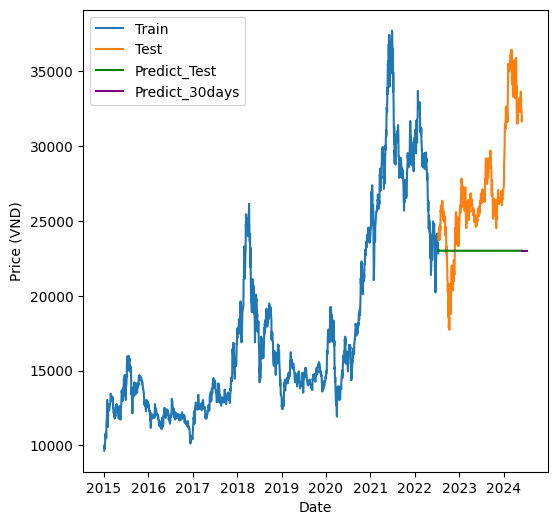

In [61]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 5594.587
MAE: 4494.983
MAPE: 15.509
